<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/4/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 本コードは以下のサイトを参考にしました
- https://www.codexa.net/ml-evaluation-cls/

In [1]:
#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#titanicデータセットを読み込んで、一部を表示
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#余計な変数を除外
drop_list = ["deck","alive"]
df = df.drop(drop_list, axis=1)
 
#欠損値を含む行を削除して、表示
df = df.dropna()

In [4]:
#データを特徴量とターゲットに分割
X = df.drop("survived",axis=1)
Y = df["survived"]

In [5]:
#特徴量のカテゴリカル変数をダミー変数化し、確認
X = pd.get_dummies(X)
X.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,True,False,0,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,False,False,1,0,1,0,0,1,0,0,0,0,1,1,0,0
2,3,26.0,0,0,7.9250,False,True,1,0,0,0,1,0,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,False,False,1,0,0,0,1,1,0,0,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,True,True,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [6]:
#特徴量とターゲットを、訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=0)

In [7]:
#ロジスティック回帰モデルのインスタンスを作成し、訓練データで学習
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
#モデルからYの値を予測して出力
Y_pred = lr.predict(X_test)

In [9]:
#混同行列、正解率、適合率、再現率、F値を表示
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
print('confusion matrix = \n', confusion_matrix(y_true = Y_test, y_pred = Y_pred))
print('accuracy = ',accuracy_score(y_true = Y_test , y_pred = Y_pred))
print('precision = ',precision_score(y_true = Y_test , y_pred = Y_pred))
print('recall = ',recall_score(y_true = Y_test , y_pred = Y_pred))
print('f1 score = ',f1_score(y_true = Y_test , y_pred = Y_pred))

confusion matrix = 
 [[179  31]
 [ 40 106]]
accuracy =  0.800561797752809
precision =  0.7737226277372263
recall =  0.726027397260274
f1 score =  0.7491166077738517


In [10]:
#必要なライブラリをインポート
from sklearn.metrics import roc_curve, precision_recall_curve, auc

#テストデータがクラス1に属する確率を予測し、その確率からFPR、TPR、閾値を計算
Y_score = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true=Y_test,y_score=Y_score)

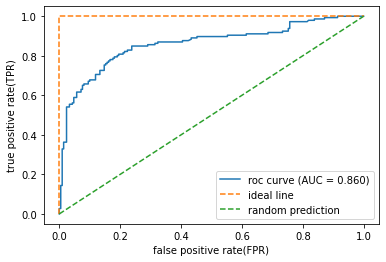

In [11]:
#ROC曲線を描き、AUCを算出
plt.plot(fpr,tpr,label='roc curve (AUC = %0.3f)' % auc(fpr,tpr))
plt.plot([0,0,1], [0,1,1], linestyle='--', label='ideal line')
plt.plot([0, 1], [0, 1], linestyle='--', label='random prediction')
plt.legend()
plt.xlabel('false positive rate(FPR)')
plt.ylabel('true positive rate(TPR)')
plt.show()